['positions_timestep_days_scale_1000.txt', 'Folkner_orbit_timestep_seconds_scale_10.txt', 'readable.py', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1000.txt']
['McKenzie_orbit_timestep_seconds_scale_1000.txt', 'Folkner_orbit_timestep_seconds_scale_1.txt', 'Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000.txt']
['Folkner_orbit_timestep_seconds_scale_10.txt', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1.txt', 'Folkner_orbit_timestep_seconds_scale_1.txt', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1000.txt']
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Getting scale by filename:
1000.0

Getting timestep by filename:
days


Importing Orbit
400 datapoints
Done in 0.46248

Obtaining proper LISA object
Done in 0.000195
Offset: 3
Data /home/ester/git/synthlisa/examples/manual-examples/output_files/2018112-new_1_synthlisa_armcalc

Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-PAA.png saved in:
/home/ester/git/synthlisa/examples/manual-examples/figures/2018112-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-diffPAA.png saved in:
/home/ester/git/synthlisa/examples/manual-examples/figures/2018112-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-PAA_all.png saved in:
/home/ester/git/synthlisa/examples/manual-examples/figures/2018112-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-Breathing_angles.png saved in:
/home/ester/git/synthlisa/examples/manual-examples/figures/2018112-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-send_receive_angle.png saved in:
/home/ester/git/synthlisa/examples/manual-examples/figures/2018112-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-Wobbli

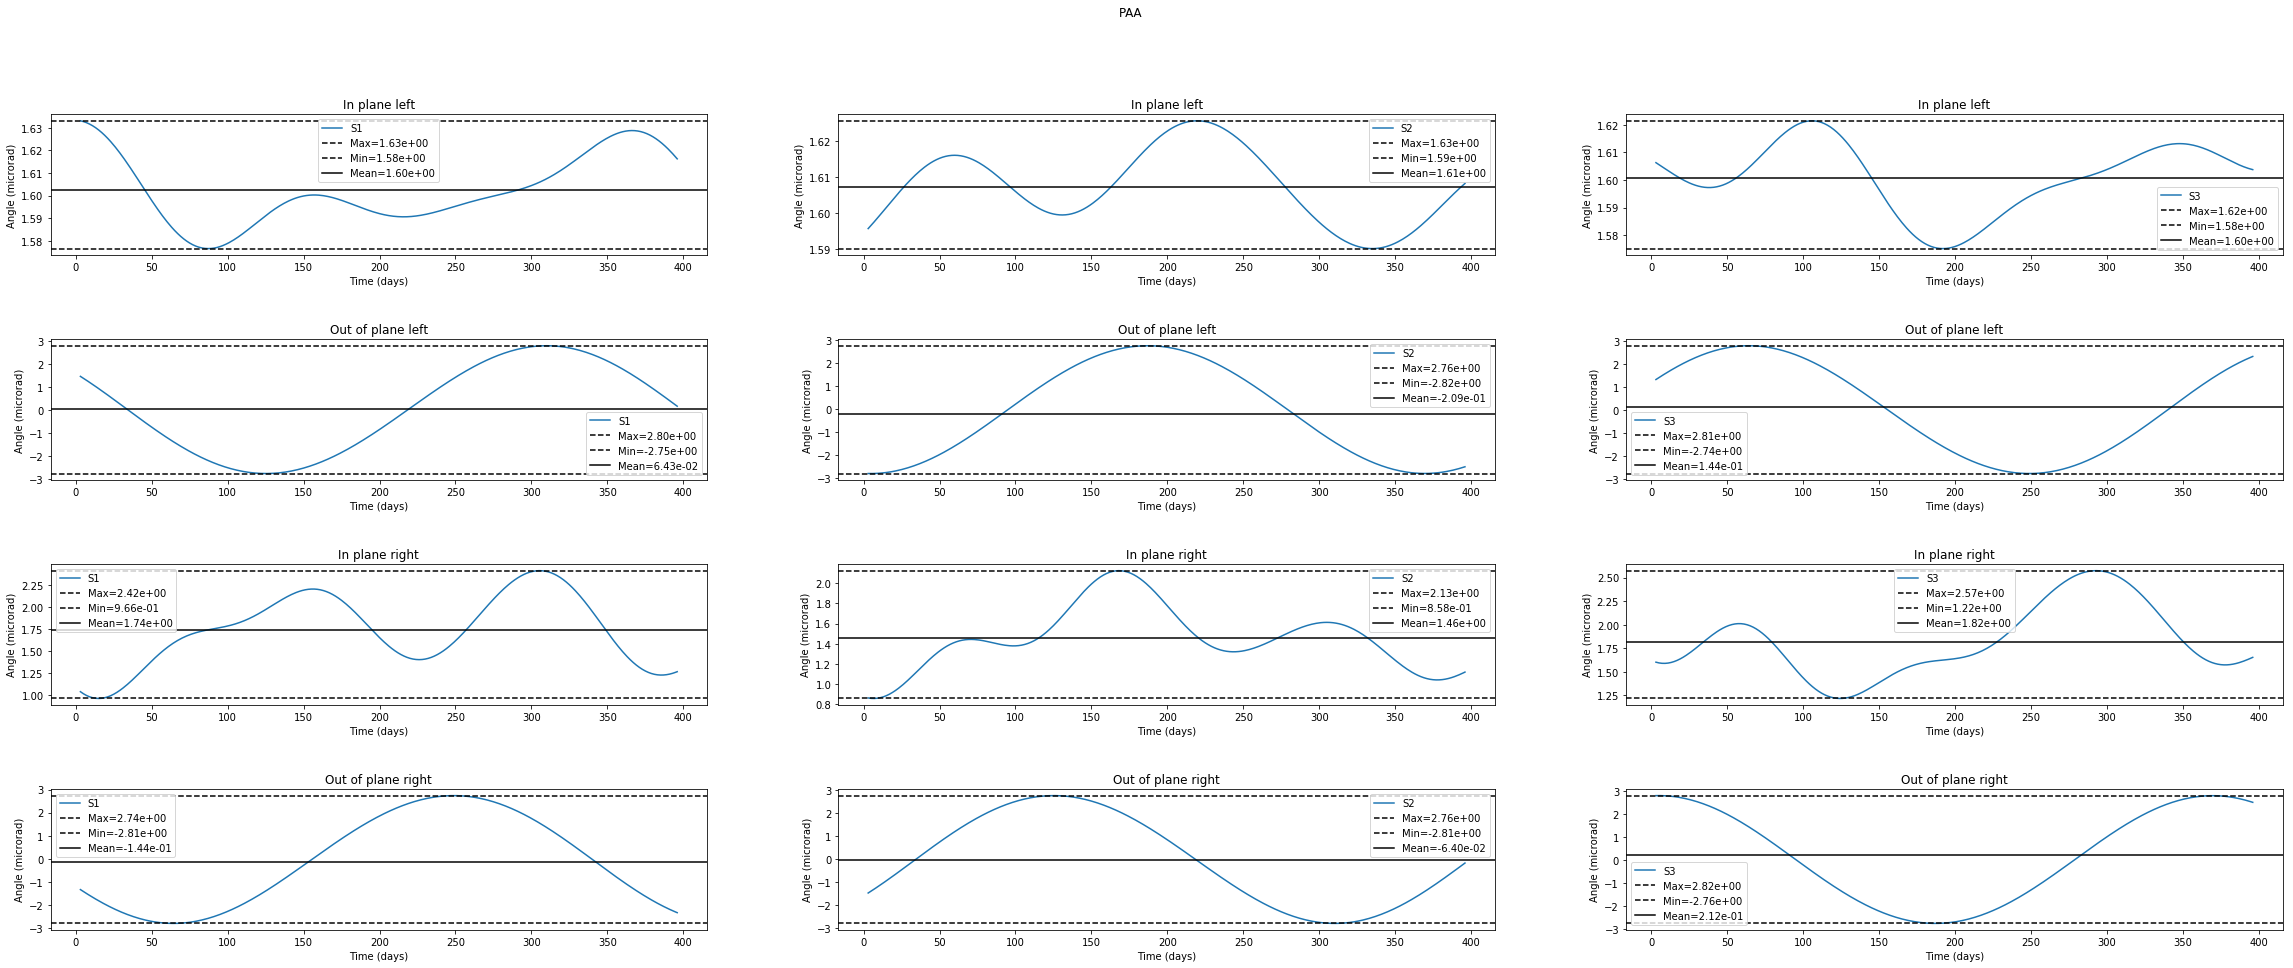

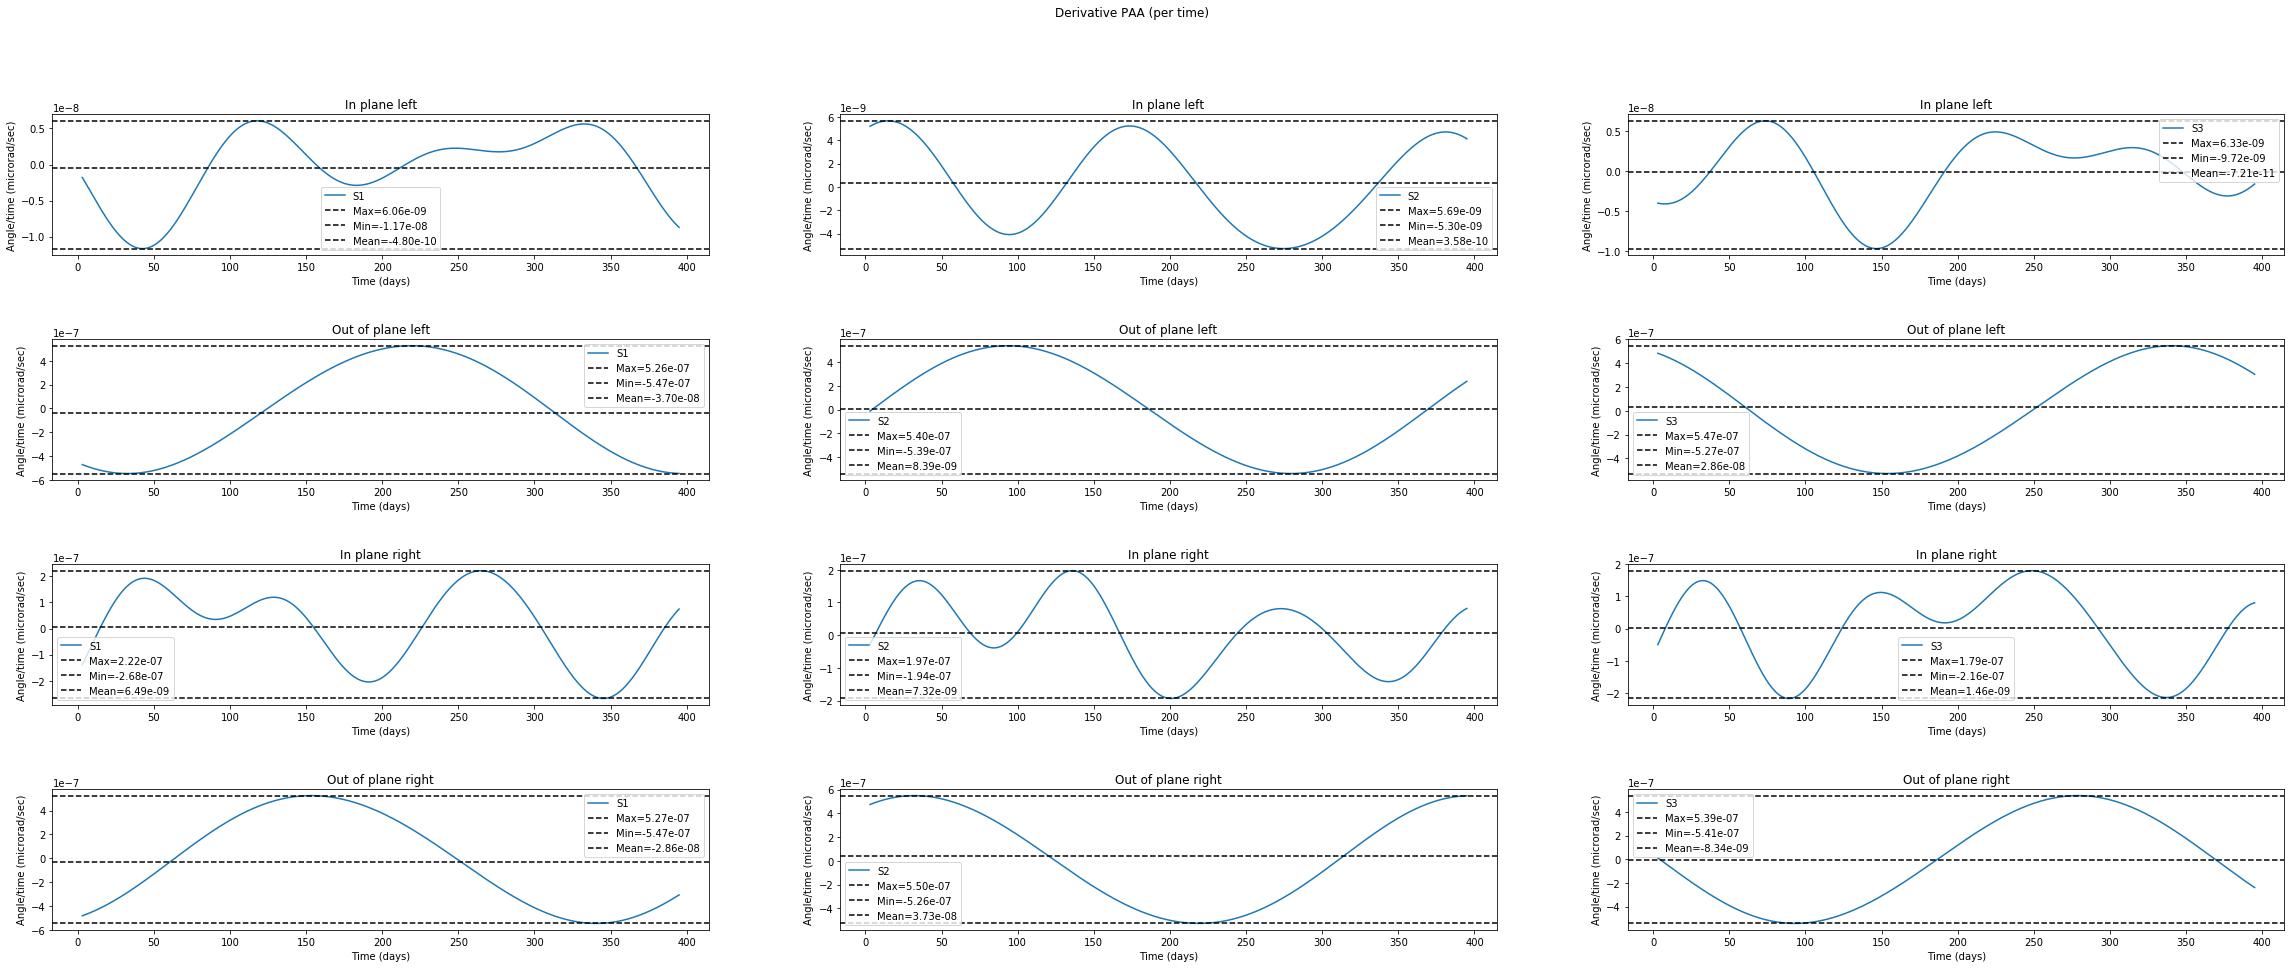

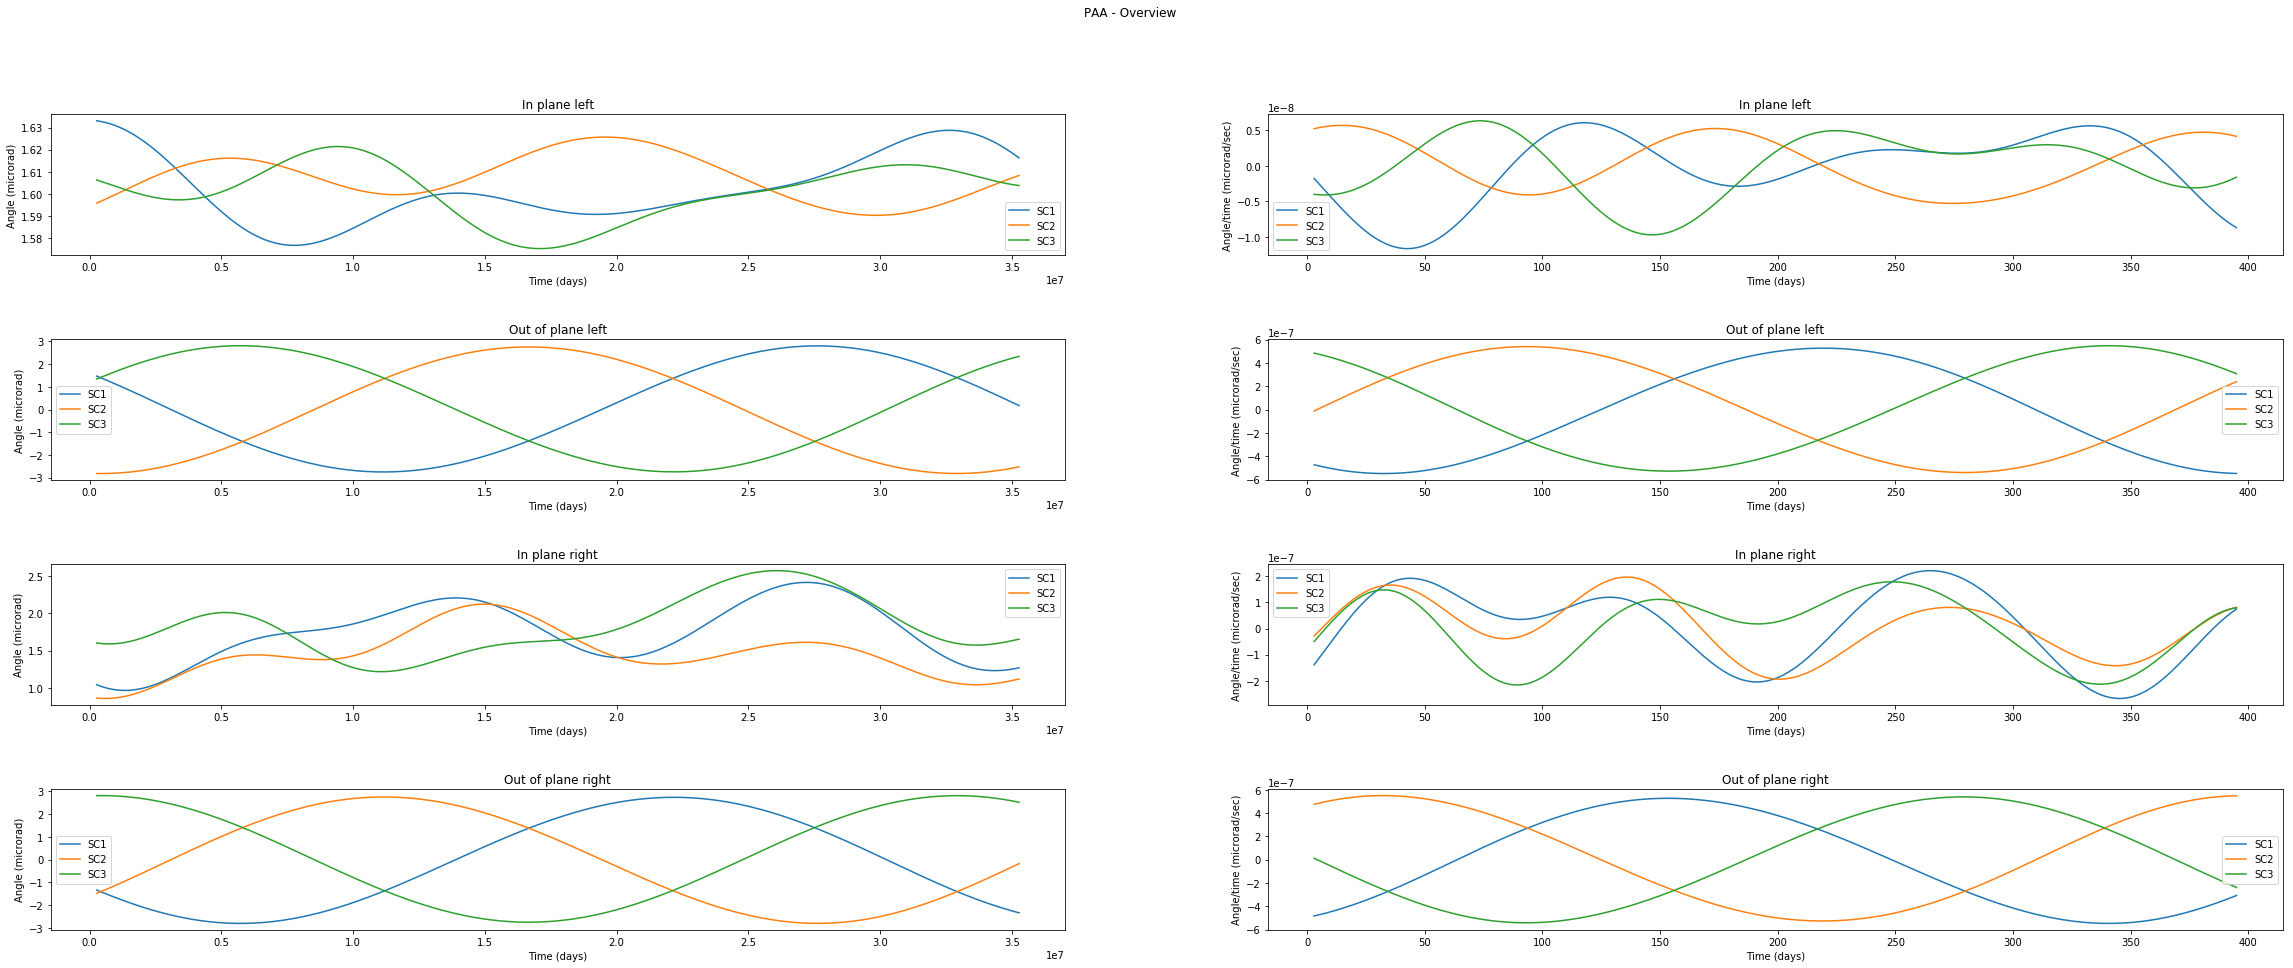

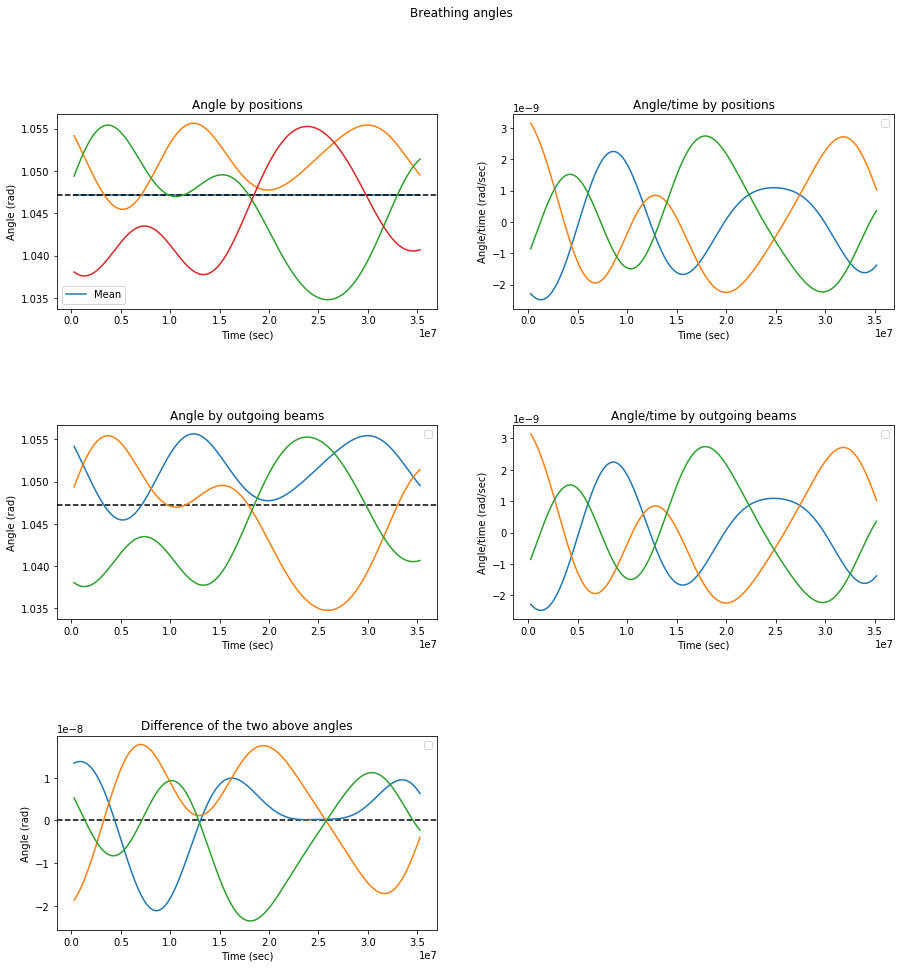

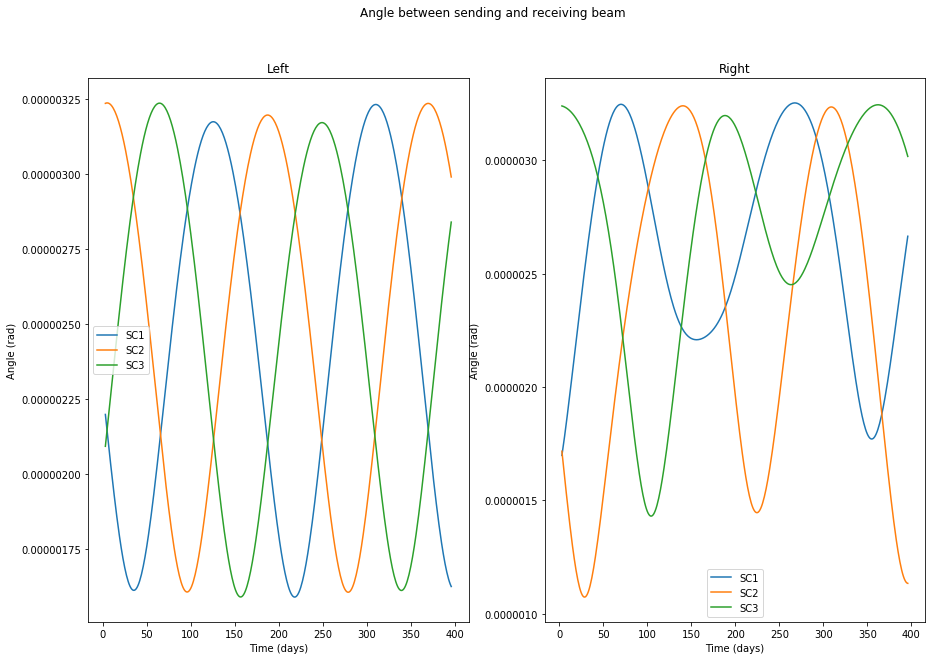

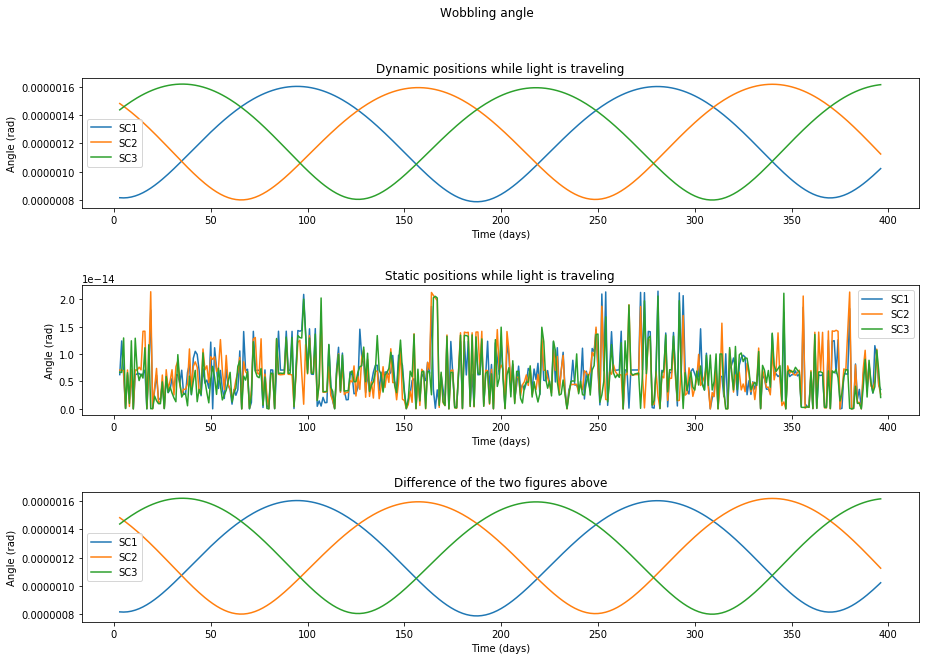

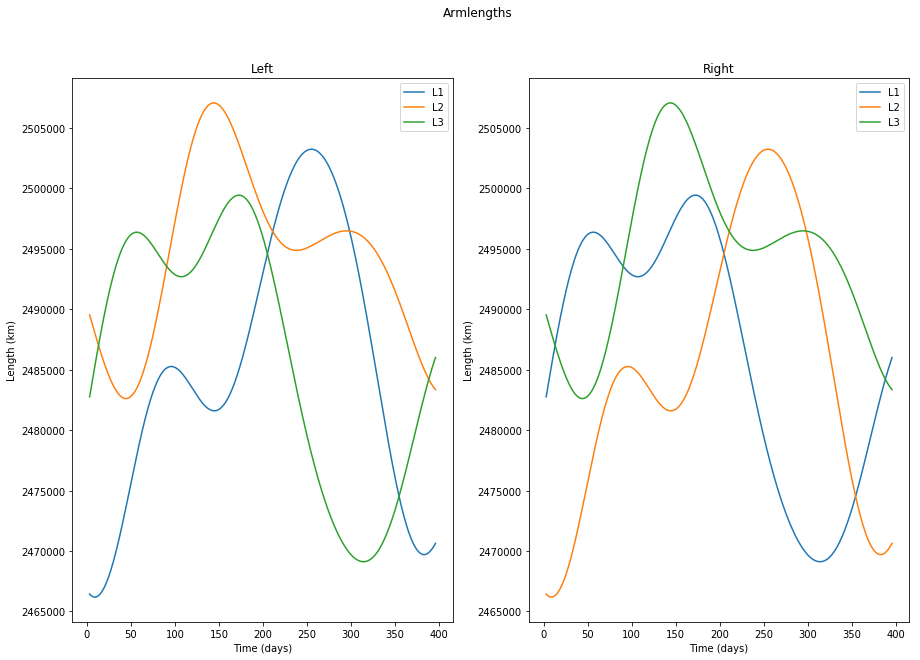

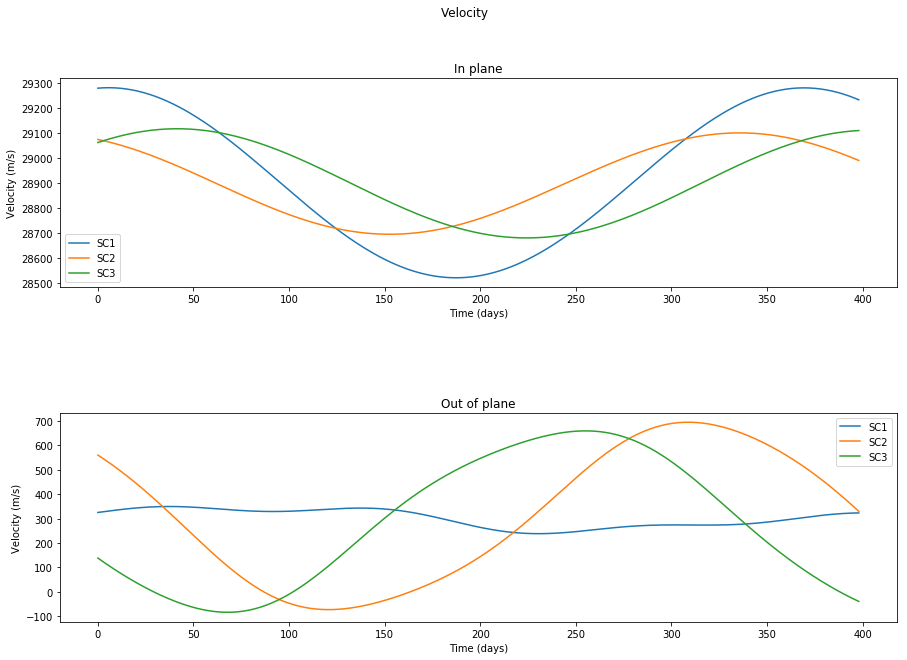

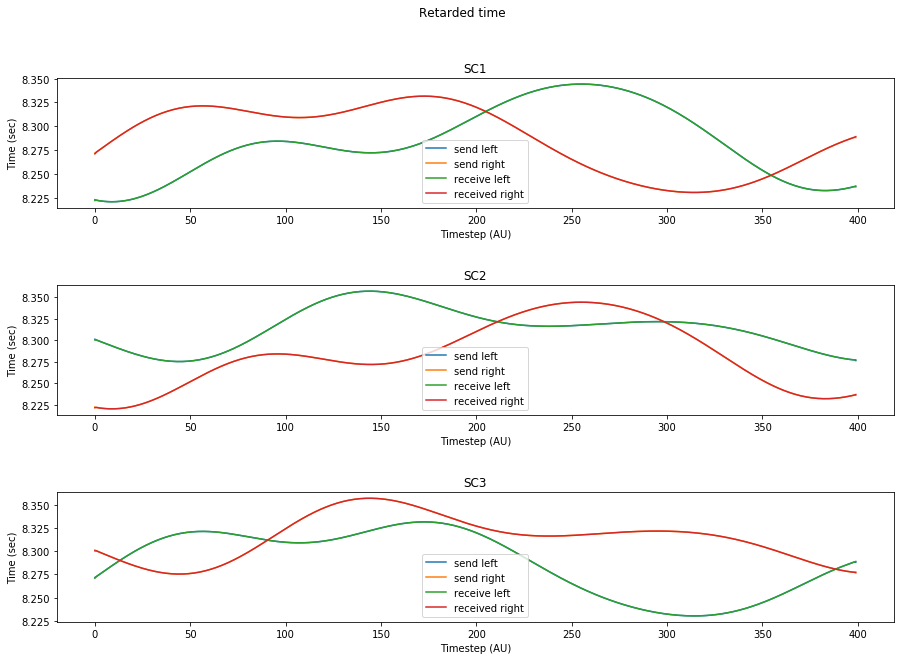

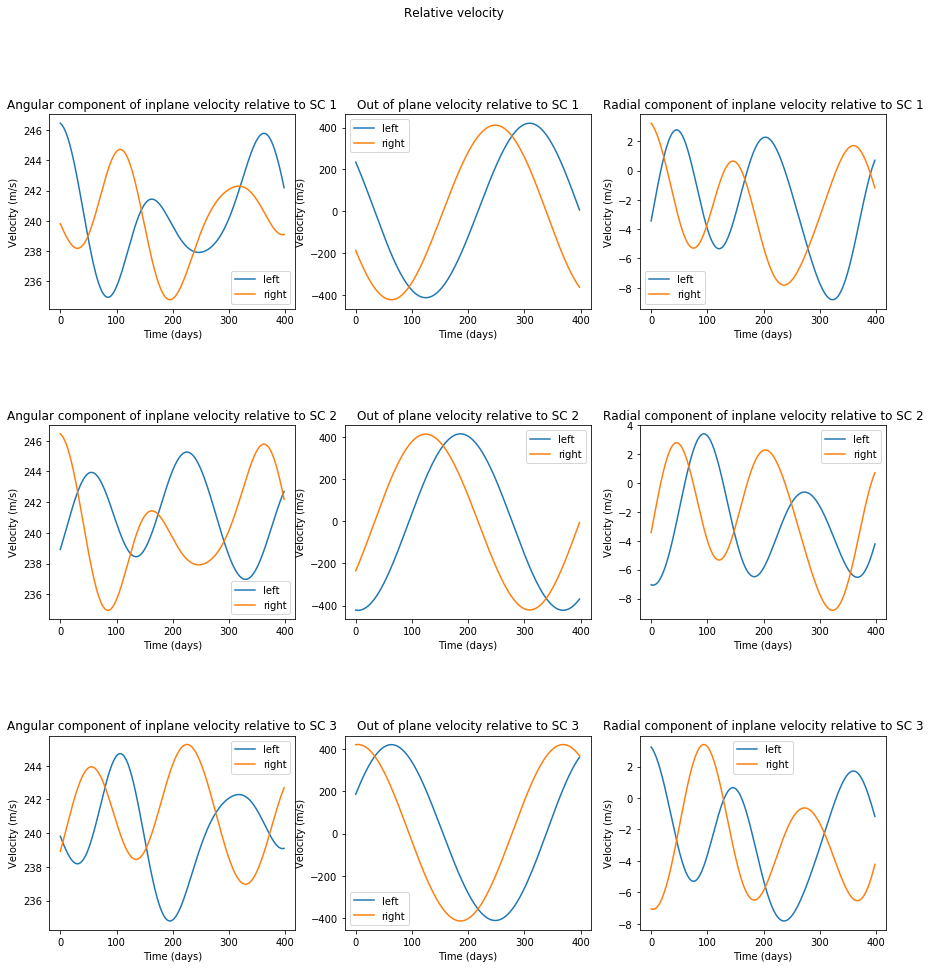

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from synthlisa import *
import numpy as np
import matplotlib.pyplot as plt
import os
from fractions import Fraction
import math
import datetime
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
from class_orbit import orbit
from PAA import PAA
from PAA import la
import warnings
warnings.filterwarnings('ignore', 'The iteration is not making good progress')
#warnings.filterwarnings("error")
import scipy.optimize


plot_on=True
year2sec=32536000
day2sec=year2sec/365.25
c=300000000
noise_check=False
home='/home/ester/git/synthlisa/'
directory_imp='lisasim/data/'




#--------
dir_orbits='/home/ester/git/synthlisa/orbits/'
LISA_opt = True
delay=True#e'Not ahead'#False

filename_list=[]

for (dirpath, dirnames, filenames) in os.walk(dir_orbits):
    print(filenames)
    for i in filenames:
        if i.split('.')[-1]=='txt':
            a = dirpath+'/'+i
            a = a.replace('//','/')
            filename_list.append(a)

#filename_list=[filename_list[0]]
#timeunit=['days']
#dir_extr='new_1_test'
dir_extr='new_1_synthlisa_armcalc'
#dir_extr='new_4_interp_arminterp'
#timeunit=['seconds','days','days']
timeunit='Default'#['days']
arm_influence=True
length_calc=400#'all'
#tstep=3600
tstep=False
count=0
method = 'fsolve'
select='Hallion'#'Folkner_orbit_timestep_seconds_scale_10'
PAA_res={}
filename_done=[]
for i in filename_list:
    filename_name = i.split('/')[-1]
    if i == filename_list[0]:
        new_folder=False # Adjust if you (don't) want to override
    else:
        new_folder=False
    print('Dir_extr:'+dir_extr)
    if select == 'all':
        if '/try/' in i:
            execute = False
        else:
            execute = True
    else:
        if select in i:
            execute = True
        else:
            execute = False

    if filename_name in filename_done:
        execute = False

    if execute == True:
        filename_save = i.split('/')[-1].split('_')[0]
        PAA_res[filename_save]=PAA(home = home,filename = i,directory_imp=False,read_max = length_calc,plot_on=True,dir_extr=dir_extr,new_folder=new_folder,timeunit=timeunit,LISA=LISA_opt,arm_influence=arm_influence,tstep=tstep,delay=delay,method=method)
        PAA_res[str(count+1)] = PAA_res[filename_save]
        filename_done.append(filename_name)
        count=count+1




for k in range(0,len(PAA_res.keys())/2):
    data = PAA_res[str(k+1)]


In [2]:
# Parameters:
labda =1064*(10**-9) # m
eta_opt = 0.23 # ...look up
eta_pd = 0.68 # A/W
P_L = 1 # W ...verufy with new LISA technical speifications
D = 0.40 # Diameter [m]
#h = 6.62607004*(10**-34) # Js
#c=300000000
#h = 1.98644568*(10**-25) # J/m
#c = 1
h = 1.0/(6.241506*(10**18))



In [3]:
# Parameters for point PAAM
PAA_out_lim = 0.5*0.000001
PAA_out_marge = 0.1*0.000001


In [4]:
for k in range(0,len(PAA_res.keys())/2):
    data = PAA_res[str(k+1)]

In [5]:
[PAA_in_l,PAA_out_l,PAA_in_r,PAA_out_r] = data.PAA_ret
[v_l,v_r,u_l,u_r] = data.beam

In [6]:
def aim(values,lim,step,offset=0):
    PAA_set_list=[]
    PAA_control_list=[]
    PAA_step_list=[]
    values_original=[]
    for i in range(0,len(values)):
        PAA_set_vec=[]
        PAA_control_vec=[]

        PAA_set = 0
        values_calc = values[i][offset:-data.offset]
        for j in range(0,len(values_calc)):
            PAA_val = values_calc[j]+PAA_set

            while PAA_val>lim:
                PAA_set = PAA_set - step
                PAA_val = PAA_val - step

            while PAA_val<-lim:
                PAA_set = PAA_set + step
                PAA_val = PAA_val + step
            PAA_set_vec.append(PAA_set)
            PAA_control_vec.append(PAA_val)
        PAA_set_list.append(np.array(PAA_set_vec))
        PAA_control_list.append(np.array(PAA_control_vec))
        values_original.append(values_calc)
        
    return [[values_original,PAA_control_list,PAA_set_list],[lim,step,offset]]

titles=['l_in','l_out','r_in','r_out']
PAA_all={}
for k in range(0,len(data.PAA_ret)):
    title = titles[k]
    [[PAA_part_original,PAA_part_control,PAA_part_set],[lim,step,offset]] = aim(data.PAA_ret[k],0.5*0.000001,0.1*0.000001,data.offset)
    
    PAA_all[title]=PAA_part_original
    
    
    

In [7]:
def i_slr(i):
    i_self = i
    i_left = (i+1)%3
    i_right = (i+2)%3

    i_ret = [i_self,i_left,i_right]
    for j in range(0,len(i_ret)):
        if i_ret[j]==0:
            i_ret[j]=3

    return i_ret

def delay(data,l_array,t,para='X',delay_on=True):
    t_del = 0
    if delay_on==True:
        for k in range(0,len(l_array)):
            j = -1-k
            i_r = (abs(l_array[j])+1)%3
            try:
                if l_array[j]>0:
                    t_del = t_del - data.L_rl[i_r-1](t - t_del)
                elif l_array[j]<0:
                    t_del = t_del - data.L_rr[i_r-1](t - t_del)
            except:
                pass

    return t_del

In [8]:
def tdi_val(i,tdi,data,t,side='l',generation=0,para='X',print_on=False,delay_on=True):
    if para=='X':
        shift = 0
    elif para=='Y':
        shift = 1
    elif para == 'Z':
        shift = 2
        
    if side == 'l':
        [r,s,l] = i_slr(i)
    elif side =='r':
        [r,l,s] = i_slr(i)
        l=-l
    
    
    id={}
    for kk in range(-3,4):
        if kk!=0:
            sign = np.sign(kk)
            abs_kk = abs(kk) - 1
            
            id[str(kk)] = (((abs_kk+shift)%3)+1)*sign
    if print_on==True:
        print(id)
    
    X = []
    
    try:
        t_del = delay(data,[id['3'],id['2'],id['-1']],t,para=para,delay_on=delay_on)
        X.append(tdi.y(id['1'],id['-3'],id['2'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['2'],id['-1']],t,para=para,delay_on=delay_on)
        X.append(tdi.y(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['-2']],t,para=para,delay_on=delay_on)
        X.append(tdi.y(id['1'],id['2,i'],id['3'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(tdi.y(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,t - t_del))

        t_del = delay(data,[id['-2'],id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-tdi.y(id['1'],id['2'],id['3'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-tdi.y(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        X.append(-tdi.y(id['1'],id['-3'],id['2'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(-tdi.y(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,t - t_del))

        t_del = delay(data,[id['2'],id['-2'],id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(-0.5*tdi.z(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['-3'],id['3'],id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(0.5*tdi.z(id['2'],id['3'],id['1v'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(-0.5*tdi.z(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['2'],id['-2'],id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(0.5*tdi.z(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,0,t - t_del))

        t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(-0.5*tdi.z(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(0.5*tdi.z(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-0.5*tdi.z(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(0.5*tdi.z(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
    except:
        pass
    
    
    return sum(X)

In [43]:
def PSD(f_list,SD_list):
    return interp1d(f_list,SD_list,bounds_error=False,fill_value=0)

def PowerLaw(SD_val,f0,exp=1):
    return lambda f: (SD_val)*((f/f0)**exp)

def add_func_help(func_list,f):

    func_ret = func_list[0]

    if len(func_list)>1:
        for i in range(1,len(func_list)):
            func_ret = func_ret(f)+func_list[i](f)

    return func_ret

def add_func(func_list):

    return lambda f: add_func_help(func_list,f)


def Noise(f0,f_max,N,psd,unit):
    M = N/2.0 +1
    df = (f_max-f0)/M

    f_lin = np.linspace(f0,f_max,M)
    psd_lin = psd(f_lin)

    ASD=[]
    phi = []
    Z_neg = []
    Z_pos = []
    for f in f_lin:
        if unit =='phasepercycle':
            ASD.append((((psd(f)**2)*2*np.pi)*2)**0.5)
        else:
            ASD.append((psd(f)*2)**0.5)
        phi.append(random.random()*2*np.pi)
        Z_pos.append(ASD[-1]*np.exp(1j*phi[-1]))
        Z_neg.append(ASD[-1]*np.exp(1j*random.random()*2*np.pi))


    Z1 = [0]*(N/2)
    Z_tot=[0]
    for i in range(0,len(Z_pos)):
        Z_tot.append(Z_pos[i])
    for i in range(0,len(Z_neg)):
        Z_tot.append(Z_neg[i])

    IFFT = np.fft.ifft(Z_tot)
    Dt = 1/(2.0*f_max)
    t0 = 0
    t_max = (N-1)*Dt
    t_IFFT = np.linspace(t0,t_max,len(IFFT))

    return [t_IFFT,IFFT]

def Noise_time(f0,f_max,N,psd,t_stop,unit='freq',t=False):
    t_max = 0
    count=0
    while t_max< t_stop:
        #print(count)
        [t_IFFT,IFFT] = Noise(f0,f_max,N,psd,unit=unit)
        if count!=0:
            t_tot = np.concatenate((t_tot,t_IFFT+t_tot[-1]))
            noise_tot = np.concatenate((noise_tot,IFFT))
        elif count==0:
            t_tot = t_IFFT
            noise_tot = IFFT
        t_max = t_tot[-1]
        #print(t_max)
        count=count+1

    t_ret = []
    noise_ret = []
    for i in range(0,len(t_tot)):
        if t_tot[i]<=t_stop:
            t_ret.append(t_tot[i])
            noise_ret.append(noise_tot[i])
    t_ret = np.array(t_ret)
    noise_ret = np.array(noise_ret)

    func_noise = interp1d(t_ret,noise_ret,bounds_error=False)
    #if func_noise!=False:
    #    func_noise = func_noise(t)
    return [t_ret,noise_ret],func_noise

In [40]:
def solve_valueerror(func,x):
    check = True
    try:
        return func(x)
    except ValueError:
        check = False
        

In [44]:
# Lasernoise
freq_lasernoise_PSD = lambda f: 400 #...source
C_func = {}
C_func_star = {}
t_ret = {}
for j in range(0,6):
    i=j%3
    f0=1e-6
    f_max = 1e-3
    t_stop = data.t_plot[i][-1]
    [t_ret_calc,noise_ret],func_noise = Noise_time(f0,f_max,4096,freq_lasernoise_PSD,t_stop)
    nu_0 = c/labda
    
    #C_i = lambda time: func_noise(time)/nu_0
    if j<3:
        C_func[str(i+1)] = interp1d(t_ret_calc,real(noise_ret/nu_0),bounds_error=False)
    else:
        C_func_star[str(i+1)] = interp1d(t_ret_calc,real(noise_ret/nu_0),bounds_error=False)
    t_ret[str(i+1)] = t_ret_calc

/home/ester/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [84]:
def y_laser(data,C,C_star,t):
    y={}
    for s in range(1,4):
        for r in range(1,4):
            check=True
            if (s - r)%3 ==1:
                sign = 'pos'
                t_del = data.L_rl_func_tot[r-1](t)
    
            elif (s - r)%3 ==2:
                sign = 'neg'
                t_del = data.L_rr_func_tot[r-1](t)
            
            elif s==r:
                check=False
            if check==True:
                if sign=='pos':
                    y[str(s)+str(r)] = C_star[str(s)](t-t_del) - C[str(r)](t)
                elif sign=='neg':
                    y[str(s)+str(r)] = C_star[str(s)](t-t_del) - C[str(r)](t)
    return y

def y_laser_calc(data,C,C_star,t_all):
    y_ret={}
    t_ret={}
    for t in t_all:
        try:
            y = y_laser(data,C,C_star,t)
            #print(y)
            for keys in y.keys():
                if keys not in y_ret.keys():
                    y_ret[keys] = []
                    t_ret[keys]=[]
                y_ret[keys].append(y[keys])
                t_ret[keys].append(t)
                print(y[keys])
        except (ValueError):
            print(t)
            pass
        #except (TypeError):
        #    print(t)
        #    pass
    
    y_ret_interp = {}
    for keys in y_ret:
        y_ret_interp[keys] = interp1d(np.array(t_ret[keys]),np.array(y_ret[keys]),bounds_error=False)
        
    return y_ret_interp

def z_laser(data,C,C_star,t):
    z={}
    for s in range(1,4):
        for r in range(1,4):
            check=True
            
            if (s - r)%3 ==1:
                sign = 'pos'
    
            elif (s - r)%3 ==2:
                sign = 'neg'
            
            elif s==r:
                check=False
            if check==True:
                if sign=='pos':
                    z[str(s)+str(r)] = C_star[str(r)](t) - C[str(r)](t)
                elif sign=='neg':
                    z[str(s)+str(r)] = C[str(r)](t) - C_star[str(r)](t)
                    
    return z

def z_laser_calc(data,C,C_star,t_all):
    z_ret={}
    t_ret={}
    for t in t_all:
        try:
            z = z_laser(data,C,C_star,t)
            #print(y)
            for keys in z.keys():
                if keys not in z_ret.keys():
                    z_ret[keys] = []
                    t_ret[keys]=[]
                z_ret[keys].append(z[keys])
                t_ret[keys].append(t)
                #print(z[keys])
        except (ValueError):
            #print(t)
            pass
        #except (TypeError):
        #    print(t)
        #    pass
    
    z_ret_interp = {}
    for keys in z_ret:
        z_ret_interp[keys] = interp1d(np.array(t_ret[keys]),np.array(z_ret[keys]),bounds_error=False)
        
    return z_ret_interp





In [85]:
y_lasernoise = y_laser_calc(data,C_func,C_func_star,data.t_plot[0])

nan
nan
nan
nan
nan
nan
-5.705433555082645e-16
-4.1131238421732607e-17
7.380963948714821e-16
6.816799771610995e-16
4.4521510675993257e-17
-4.280543027370664e-16
-8.337242295595323e-16
5.95953975310765e-16
6.5696017241396525e-16
5.390534589003318e-16
6.145853181957988e-16
-6.974281740604046e-16
9.612488261921856e-16
-7.852961830263447e-16
-1.8615653309254073e-16
-1.1569478253525325e-16
-1.1322949147251534e-15
5.437875395478147e-16
4.0372474479337535e-16
7.695301165787531e-16
7.078846904736667e-16
-7.984336753556125e-17
-5.324507740378143e-17
3.6848828527617233e-16
-1.7070898890976294e-15
-1.293923973070554e-15
2.0683077595767113e-16
-1.4289074194318135e-16
3.4727325372183577e-16
2.842525580811844e-16
-1.3455861803676683e-15
-1.3123946972634547e-16
1.3530992202767377e-15
-1.3557739985843996e-15
-2.9539715691560784e-16
1.198865611243287e-15
1.7361213051520696e-15
1.8172609281030577e-16
-1.121018494135048e-15
7.441125173967816e-16
1.8459540421267864e-15
1.5353129105513396e-15
-2.0554176105

-6.359293775930021e-16
-2.542737251395788e-15
-1.4097632396398918e-15
5.238644330296482e-16
-2.2461338404960797e-15
8.254966899578895e-16
-5.268963854563357e-16
1.1146768901030962e-15
3.387050472113031e-15
-1.672518223150155e-15
-2.592424651634106e-15
-1.0350244156094376e-15
-1.1618263395721002e-15
6.219280340234921e-17
-1.2664172193272814e-15
-1.5868112991363146e-16
1.2967602025724397e-15
-1.0696448731257738e-15
-1.7856324425734683e-15
3.484846149726624e-15
1.324489453643398e-15
-1.2259898577516676e-15
1.6509090709746564e-15
3.9503121733096994e-17
3.2030669952692906e-16
3.972489545474223e-16
-2.1392284096227158e-16
1.1994719291060478e-15
1.52945965304349e-15
-9.097780431554954e-16
7.772736944032818e-16
-1.1224622972584333e-15
-2.231101115404451e-15
1.5844444627933653e-15
1.0060214440583902e-15
-2.4200549621137666e-16
-3.8798677064436195e-15
9.541295355301095e-16
1.5297593935481941e-15
-2.2162826130187862e-15
8.456981952254894e-16
9.336978489426102e-16
-7.058967601315004e-16
6.31885347

1.3035831121506167e-15
3.757107725456205e-15
-1.1641527099361611e-15
-2.7062354429673157e-15
1.4321920392524128e-15
5.212072613821262e-16
8.528183320327828e-16
-2.070130190409674e-15
-1.3925942430426811e-15
1.9086489512443233e-15
-1.8333156049186053e-15
-2.21149179907024e-15
9.422197918637762e-16
1.3854581257598478e-15
-4.522780583998101e-16
-7.098721147098307e-16
8.262053655975358e-19
-1.8478157634248746e-16
-9.905459232377869e-17
2.1638437255661022e-16
-5.854154575087343e-16
2.867834146190497e-16
-2.454896999185935e-15
-3.642939086533522e-15
1.7051420610933024e-16
-5.441682209707017e-16
9.65844116334393e-16
7.514055544813208e-16
-1.0963243698905448e-15
-1.6734524297506813e-16
-1.4553708854239797e-15
-9.686629045112022e-16
8.538970307555643e-16
1.771427257741566e-16
2.520987677974421e-16
4.417903214050788e-16
3.95204597325711e-16
-1.0152258464568477e-15
-1.9159081643326457e-15
-1.4361913506570195e-15
-1.1294244300038127e-15
-1.991326849595244e-16
-1.1602349263693778e-15
1.060762527595

In [86]:
z_lasernoise = z_laser_calc(data,C_func,C_func_star,data.t_plot[0])

In [56]:
# Shot noise
P_v_l=[]
P_v_l0=[]
P_v_r=[]
P_v_r0=[]
phi_l_sn_q = []
phi_r_sn_q = []

for i in range(0,len(data.t_plot)):
    i_self = i+1
    t = data.t_plot[i]
    v_l_func = data.v_l_func_tot[i]
    v_r_func = data.v_r_func_tot[i]
    u_l_func = data.u_l_func_tot[i]
    u_r_func = data.u_r_func_tot[i]
    P_v_l_vec=[]
    P_v_l0_vec=[]
    P_v_r_vec=[]
    P_v_r0_vec=[]
    phi_l_sn_q_vec = []
    phi_r_sn_q_vec = []
    
    for j in range(0,len(t)):
        v_l = v_l_func(t[i])
        L = np.linalg.norm(v_l)
        ang_v_l_in = data.PAA_beam_next_sc[0][i][j] - np.radians(30)
        ang_v_l_out = data.PAA_beam_next_sc[1][i][j] - np.radians(30)
        P_rec0 = ((np.pi**2)*(D**4)*(eta_opt*P_L))/(16*(labda**2)*(L**2))
        P_rec = P_rec0*np.cos(ang_v_l_in)*np.cos(ang_v_l_out)
        P_v_l_vec.append(P_rec)
        P_v_l0_vec.append(P_rec0)

        phi_l_sn_q_vec.append((h/(eta_pd*(P_rec/4.0)))**0.5) # Shot noise per quadrant (upper limit)
            
        v_r = v_r_func(t[i])
        L = np.linalg.norm(v_r)
        ang_v_r_in = data.PAA_beam_next_sc[2][i][j] - np.radians(30)
        ang_v_r_out = data.PAA_beam_next_sc[3][i][j] - np.radians(30)
        P_rec0 = ((np.pi**2)*(D**4)*(eta_opt*P_L))/(16*(labda**2)*(L**2))
        P_rec = P_rec0*np.cos(ang_v_r_in)*np.cos(ang_v_r_out)
        P_v_r_vec.append(P_rec)
        P_v_r0_vec.append(P_rec0)

        phi_r_sn_q_vec.append((h/(eta_pd*(P_rec/4.0)))**0.5) # Shot noise per quadrant (upper limit)
    
    P_v_l.append(np.array(P_v_l_vec))
    P_v_l0.append(np.array(P_v_l0_vec))
    P_v_r.append(np.array(P_v_r_vec))
    P_v_r0.append(np.array(P_v_r0_vec))
    phi_l_sn_q.append(np.array(phi_l_sn_q_vec))
    phi_r_sn_q.append(np.array(phi_r_sn_q_vec))
    
P_r_l_func = {}
P_r_r_func={}
P_r_l_max = {}
P_r_r_max = {}

for i in range(0,3):
    P_r_l_func[str(i+1)] = interp1d(t,P_v_l0[i],bounds_error=False)
    P_r_r_func[str(i+1)] = interp1d(t,P_v_r0[i],bounds_error=False)
    P_r_l_max[str(i+1)] = max(P_v_l0[i])
    P_r_r_max[str(i+1)] = max(P_v_r0[i])

In [57]:
# Shot noise
def y_shot(data,P_r_l_max,P_r_r_max,t):
    y={}
    # ... Using the maximum value of P_r_r(/P_r_l) to cancel time dependance
    for s in range(1,4):
        for r in range(1,4):
            check=True
            if (s - r)%3 ==1:
                P_r = P_r_l_max[str(r)]
    
            elif (s - r)%3 ==2:
                P_r = P_r_r_max[str(r)]
            
            elif s==r:
                check=False
            hcbar = 3.16152649e-26
            if check==True:
                psd = lambda f: ((hcbar)/(2*np.pi*labda*P_r))*1e-18 #...adjust
                
                [t_ret,noise_ret],func_noise = Noise_time(1e-8,1e-5,256,psd,data.t_plot[r-1][-1],t=t)
            
                y[str(s)+str(r)] = func_noise(t)
    
    return y,psd

def y_shot_calc(data,P_r_l_max,P_r_r_max,t_all):
    y_ret={}
    t_ret={}
    count = 1
    for t in t_all:
        print('check')
        try:
            y = y_shot(data,P_r_l_max,P_r_r_max,t)[0]
            for keys in y.keys():
                if keys not in y_ret.keys():
                    y_ret[keys] = []
                    t_ret[keys]=[]
                y_ret[keys].append(real(y[keys]))
                t_ret[keys].append(t)
        except (ValueError):
            pass
        #except (TypeError):
        #    print(t)
        #    pass
        
        count=count+1
    y_ret_interp = {}
    for keys in y_ret:
        y_ret_interp[keys] = interp1d(np.array(t_ret[keys]),np.array(y_ret[keys]),bounds_error=False)
    
    return y_ret_interp

In [58]:
y_shotnoise = y_shot_calc(data,P_r_l_max,P_r_r_max,data.t_plot[0])

check
check
check
check
check
check


/home/ester/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
check
chec

In [59]:
t_tot={}
y_tot={}
y_laser={}
y_shot={}
for key in y_lasernoise.keys():
    t_vec=[]
    y_vec=[]
    y_shot_vec=[]
    y_laser_vec=[]
    for t in data.t_plot[int(key[-1])-1]:
        check = True
        try:
            y_laser_calc = real(y_lasernoise[key](t))
            y_shot_calc = real(y_shotnoise[key](t))
            y = y_laser_calc + y_shot_calc
        except:
            check = False
        if check==True:
            t_vec.append(t)
            y_vec.append(y)
            y_shot_vec.append(y_shot_calc)
            y_laser_vec.append(y_laser_calc)
    
    t_tot[key] = np.array(t_vec)
    y_tot[key] = np.array(y_vec)
    y_laser[key] = np.array(y_laser_vec)
    y_shot[key] = np.array(y_shot_vec)
    
        

/home/ester/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


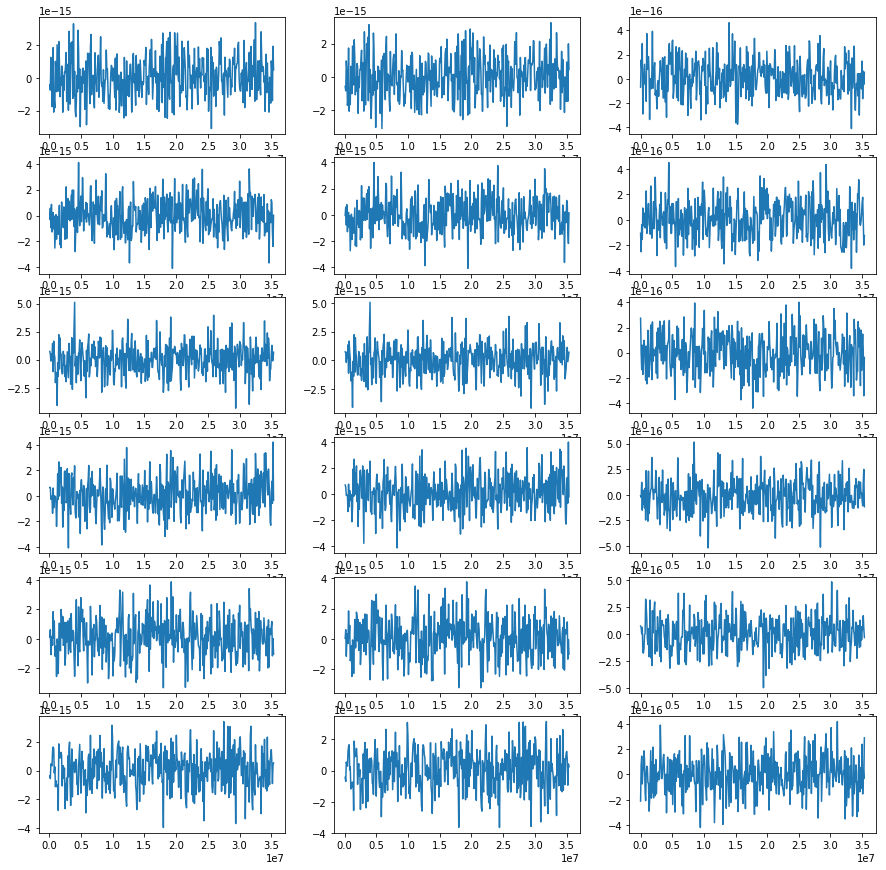

In [60]:
f,ax = plt.subplots(len(y_tot.keys()),3,figsize=(15,15))
for i in range(0,len(ax)):
    key = y_tot.keys()[i]
    ax[i,0].plot(t_tot[key],y_tot[key])
    ax[i,1].plot(t_tot[key],y_laser[key])
    ax[i,2].plot(t_tot[key],y_shot[key])
    
    
f.show()

In [118]:
def tdi_val(data,t_vec,y_all,z_all,y_all_include='all',side='l',generation=0,para='X',print_on=False,delay_on=True):
    
    #y=y_all['shot']
    #y={}
    #for sources in y_all.keys():
    #    if (sources in y_all_include) or (y_all_include=='all'):
    #        for keys in y_all[sources].keys():
    #            if keys not in y.keys():
    #                y[keys] = lambda time: y_all[sources][keys](time)
    #            else:
    #                y[keys] = lambda time: y[keys](time) +y_all[sorces][keys](time)
    
    if para=='X':
        shift = 0
        method='XYZ'
    elif para=='Y':
        shift = 1
        method='XYZ'
    elif para == 'Z':
        shift = 2
        method='XYZ'
    elif para=='alpha':
        shift = 0
        method='aby'
    elif para=='beta':
        shift = 1
        method='aby'
    elif para == 'gamma':
        shift = 2
        method='aby'
    elif para=='X1':
        shift = 0
        method='X1Y1Z1'
    elif para=='Y1':
        shift = 1
        method='X1Y1Z1'
    elif para == 'Z1':
        shift = 2
        method='X1Y1Z1'
    elif para=='P':
        shift = 0
        method='PQR'
    elif para=='Q':
        shift = 1
        method='PQR'
    elif para == 'R':
        shift = 2
        method='PQR'
    
    
    
    
    
    id={}
    for kk in range(-3,4):
        if kk!=0:
            sign = np.sign(kk)
            abs_kk = abs(kk) - 1
            
            id[str(kk)] = (((abs_kk+shift)%3)+1)*sign
    if print_on==True:
        print(id)
    
    def id_convert(s,r):
        return str(id[str(s)])+str(id[str(r)])
        
    X = []
    
    def obtain_tdi_aby(data,id,para,y,t):
        a=[]
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        a.append(y[id_convert(3,1)](t-t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        a.append(-y[id_convert(2,1)](t-t_del))
        
        t_del = delay(data,[id['2']],t,para=para,delay_on=delay_on)
        a.append(y[id_convert(2,3)](t-t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        a.append(-y[id_convert(3,2)](t-t_del))
        
        t_del = delay(data,[id['1'],id['2']],t,para=para,delay_on=delay_on)
        a.append(y[id_convert(1,2)](t-t_del))

        t_del = delay(data,[id['1'],id['3']],t,para=para,delay_on=delay_on)
        a.append(-y[id_convert(1,3)](t-t_del))

        a = np.array(a)
        
        return sum(real(a))
    
    def obtain_tdi_P(data,id,para,y,t):
        P = []
        
        t_del = delay(data,[id['2']],t,para=para,delay_on=delay_on)
        P.append(y[id_convert(1,2)](t-t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        P.append(-y[id_convert(1,3)](t-t_del))
        
        t_del = delay(data,[id['2']],t,para=para,delay_on=delay_on)
        P.append(-y[id_convert(3,2)](t-t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        P.append(y[id_convert(2,3)](t-t_del))
        
        t_del = delay(data,[id['1'],id['3']],t,para=para,delay_on=delay_on)
        P.append(y[id_convert(3,2)](t-t_del))
        
        t_del = delay(data,[id['1'],id['2']],t,para=para,delay_on=delay_on)
        P.append(-y[id_convert(2,3)](t-t_del))
        
        t_del = delay(data,[id['3'],id['1'],id['1']],t,para=para,delay_on=delay_on)
        P.append(y[id_convert(1,3)](t-t_del))
        
        t_del = delay(data,[id['2'],id['1'],id['1']],t,para=para,delay_on=delay_on)
        P.append(-y[id_convert(1,2)](t-t_del))
        
        P = np.array(P)
        
        return sum(real(P))
        
        
        
    def obtain_tdi_X_adjusted(data,id,para,y,t):
        X=[]
        
        t_del = delay(data,[id['3'],id['2'],id['2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(3,2)](t-t_del))
        
        t_del = delay(data,[id['2'],id['3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(2,3)](t-t_del))
        
        t_del = delay(data,[id['2'],id['2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(2,1)](t-t_del))
        
        t_del = delay(data,[id['3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(3,1)](t-t_del))
        
        t_del = delay(data,[id['2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,3)](t-t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,2)](t-t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(3,1)](t-t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(2,1)](t-t_del))

        X = np.array(X)
        
        return sum(real(X))
        
        
    def obtain_tdi(data,id,para,y,z,t):
        X=[]
        
        t_del = delay(data,[id['3'],id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,2)](t+t_del))
        
        t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(2,1)](t+t_del))
        
        t_del = delay(data,[id['-2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(3,1)](t+t_del))
        
        t_del = delay(data,[id['-2'],id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(3,1)](t+t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,2)](t+t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(2,1)](t+t_del))
        
        
        if z!=False:
            t_del = delay(data,[id['2'],id['-2'],id['-3'],id['3']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['-3'],id['3'],id['2'],id['-2']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))
    
        X = np.array(X)
        
        return sum(real(X))
    
    X_ret=[]
    t_ret=[]
    for t in t_vec:
        try:
            X = 0
            if y_all_include=='all':
                y_all_include = y_all.keys()
            for source in y_all_include:
                if method=='XYZ':
                    X = X + obtain_tdi(data,id,para,y_all[source],z_all[source],t)
                elif method=='aby':
                    X = X + obtain_tdi_aby(data,id,para,y_all[source],t)
                elif method=='X1Y1Z1':
                    X = X + obtain_tdi_X_adjusted(data,id,para,y_all[source],t)
                elif method=='PQR':
                    X = X + obtain_tdi_P(data,id,para,y_all[source],t)
            
            X_ret.append(X)
            t_ret.append(t)
            #print(X_ret[-1])
        except ValueError:
            #print "Unexpected error:", sys.exc_info()[0]
            #print(t)
            #raise ValueError('can not calculate at t='+str(t))
            pass
        
    return np.array(t_ret),np.array(X_ret)
    
    
    

In [119]:
y_list=['shot','laser']
y_all={}
z_all={}
y_all['shot'] = y_shotnoise
y_all['laser'] = y_lasernoise
z_all['laser'] = z_lasernoise
z_all['shot'] = False

In [120]:
def errorsolve(x,func):
    try:
        return func(x)
    except ValueError:
        return np.nan

In [121]:
tdi_all = {}
tdi_shot = {}
tdi_laser = {}
para = ['X','Y','Z','alpha','beta','gamma','X1','Y1','Z1','P','Q','R']

for i in range(0,len(para)):
    X_vec = []
    t_vec = []
    X_vec_s = []
    t_vec_s = []
    X_vec_l = []
    t_vec_l = []
    
    t,X_calc= tdi_val(data,data.t_plot[0],y_all,z_all,y_all_include=y_list,para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_all[para[i]] = [np.array(t),np.array(X_calc),func]
      
    t,X_calc= tdi_val(data,data.t_plot[0],y_all,z_all,y_all_include=['shot'],para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_shot[para[i]] = [np.array(t),np.array(X_calc),func]
       
    t,X_calc= tdi_val(data,data.t_plot[0],y_all,z_all,y_all_include=['laser'],para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_laser[para[i]] = [np.array(t),np.array(X_calc),func]        

/home/ester/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in divide
/home/ester/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide


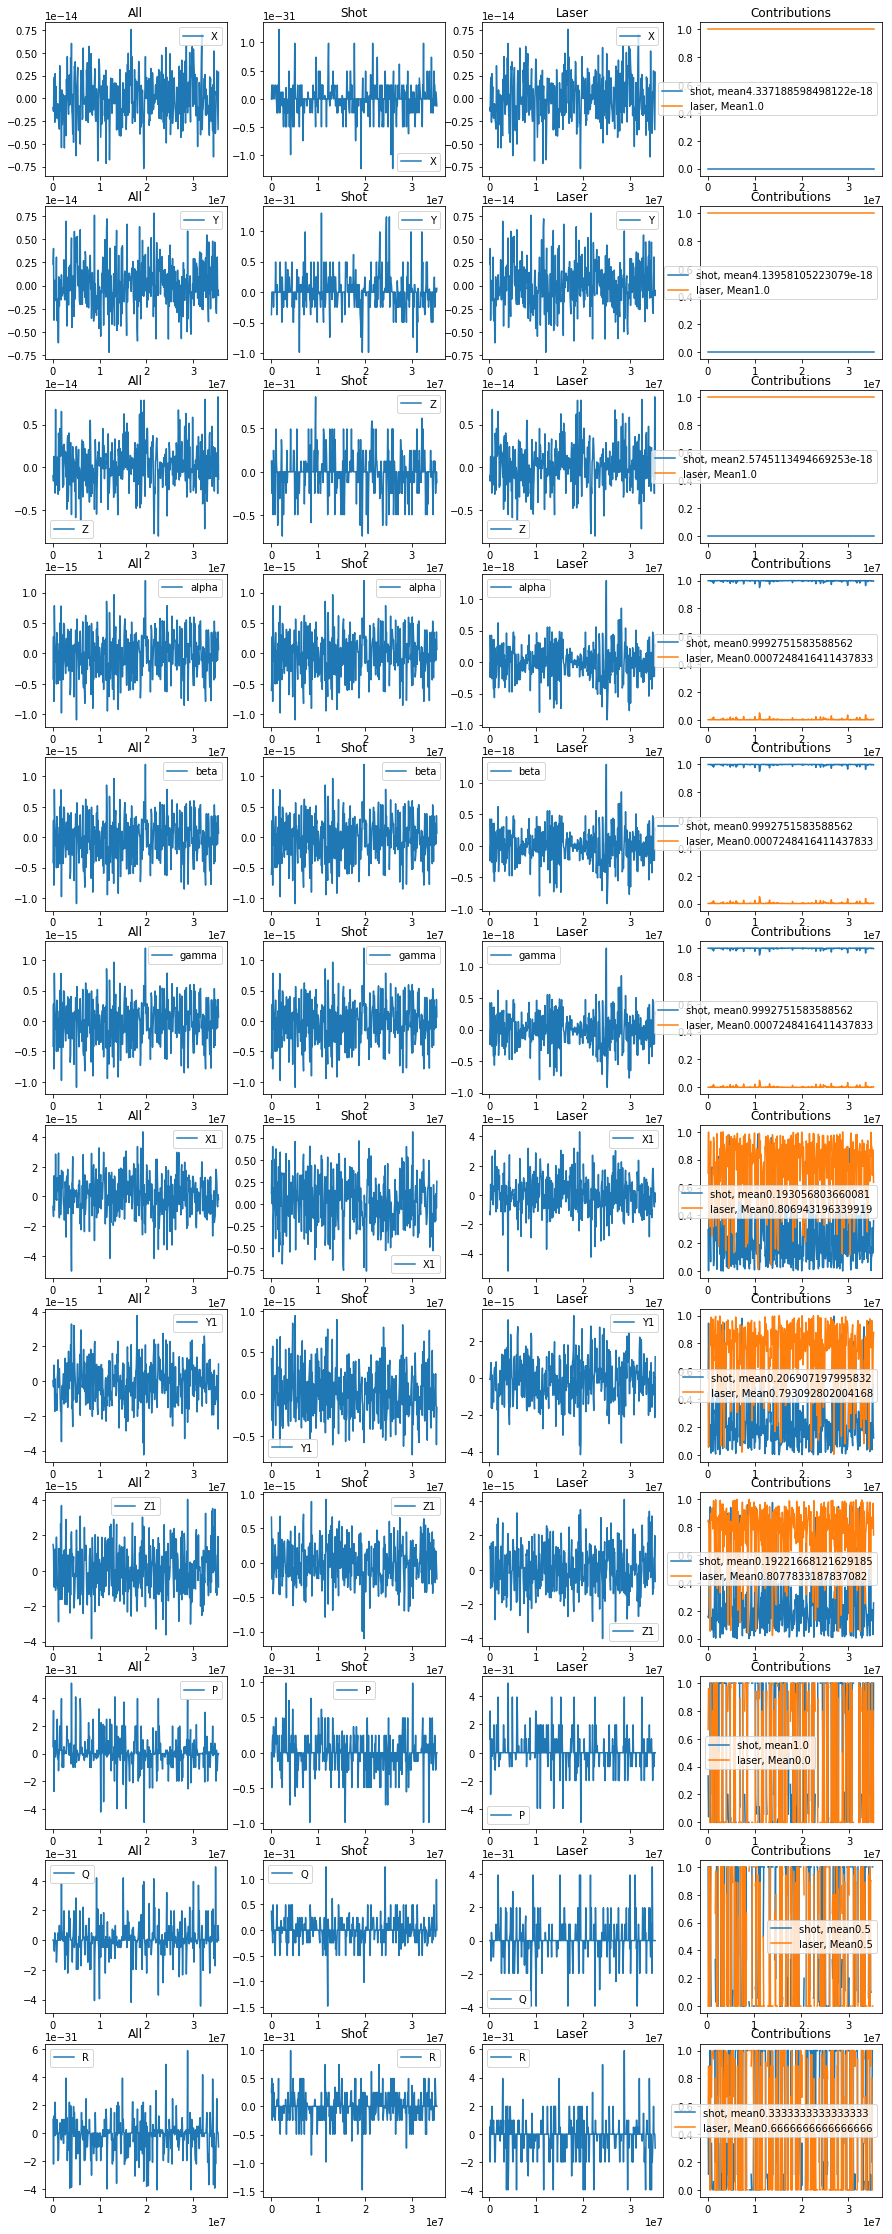

In [122]:
def mean(x):
    x_new = []
    for i in x:
        if np.isnan(i)== False:
            x_new.append(i)
    x_new=np.array(x_new)
    
    return [sum(x_new)/len(x_new),np.median(x_new)]

sorted_list = sorted(tdi_all.keys())
f,ax = plt.subplots(len(sorted_list),4,figsize=(15,40))
count=0



for keys in para:
    ax[count,0].set_title('All')
    ax[count,0].plot(tdi_all[keys][0],tdi_all[keys][1],label=keys)
    ax[count,0].legend(loc='best')
    ax[count,1].set_title('Shot')
    ax[count,1].plot(tdi_shot[keys][0],tdi_shot[keys][1],label=keys)
    ax[count,1].legend(loc='best')
    ax[count,2].set_title('Laser')
    ax[count,2].plot(tdi_laser[keys][0],tdi_laser[keys][1],label=keys)
    ax[count,2].legend(loc='best')
    
    y_plot1 = abs(tdi_shot[keys][1])/(abs(tdi_shot[keys][1])+abs(tdi_laser[keys][1]))
    y_plot2 = abs(tdi_laser[keys][1])/(abs(tdi_shot[keys][1])+abs(tdi_laser[keys][1]))
    ax[count,3].set_title('Contributions')
    ax[count,3].plot(tdi_all[keys][0],y_plot1,label ='shot, mean'+str(mean(y_plot1)[1]))
    ax[count,3].plot(tdi_all[keys][0],y_plot2,label='laser, Mean'+str(mean(y_plot2)[1]))
    #ax[count,3].plot(tdi_all[keys][0],y_plot1+y_plot2,label ='Total')
    ax[count,3].legend(loc='best')
    
    
    
    
    
    count=count+1
    

In [ ]:
tdi_all = {}
tdi_shot = {}
tdi_laser = {}
para = ['X','Y','Z']

for i in range(0,len(data.t_plot)):
    X_vec = []
    t_vec = []
    X_vec_s = []
    t_vec_s = []
    X_vec_l = []
    t_vec_l = []
    
    t,X_calc= tdi_val(data,data.t_plot[i],y_all,y_all_include=y_list,para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_all[para[i]] = [np.array(t),np.array(X_calc),func]
      
    t,X_calc= tdi_val(data,data.t_plot[i],y_all,y_all_include=['shot'],para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_shot[para[i]] = [np.array(t),np.array(X_calc),func]
       
    t,X_calc= tdi_val(data,data.t_plot[i],y_all,y_all_include=['laser'],para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_laser[para[i]] = [np.array(t),np.array(X_calc),func]